<a href="https://colab.research.google.com/github/huishulp24/Assessment_file/blob/main/Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [17]:
from google.colab import files

upload = files.upload()

Saving data_1.csv to data_1 (1).csv


In [18]:
# view the files
df = pd.read_csv('data_1.csv')

In [19]:
#df is printing all the information of the dataframe
df


,Country,Year,No. of cases,No. of deaths,WHO Region
0,Guatemala,2000,53311,0,Americas
1,Honduras,2000,35125,0,Americas
2,Tajikistan,2000,19064,0,Europe
3,Turkey,2000,11432,0,Europe
4,Mexico,2000,7390,0,Americas
...,...,...,...,...,...
1549,Burkina Faso,2017,10225459,4144,Africa
1550,Burundi,2017,7670177,4414,Africa
1551,Uganda,2017,11667831,5111,Africa
1552,Angola,2017,3874892,13967,Africa


In [20]:
df.head() # returns the first 5rows

,Country,Year,No. of cases,No. of deaths,WHO Region
0,Guatemala,2000,53311,0,Americas
1,Honduras,2000,35125,0,Americas
2,Tajikistan,2000,19064,0,Europe
3,Turkey,2000,11432,0,Europe
4,Mexico,2000,7390,0,Americas


In [21]:
df.tail() # returns the last 5rows

,Country,Year,No. of cases,No. of deaths,WHO Region
1549,Burkina Faso,2017,10225459,4144,Africa
1550,Burundi,2017,7670177,4414,Africa
1551,Uganda,2017,11667831,5111,Africa
1552,Angola,2017,3874892,13967,Africa
1553,Democratic Republic of the Congo,2017,15176927,27458,Africa


In [22]:
df.info() # returns metadata on your DataFrame we have 5 columns and 1554 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country        1554 non-null   object
 1   Year           1554 non-null   int64 
 2   No. of cases   1554 non-null   int64 
 3   No. of deaths  1554 non-null   int64 
 4   WHO Region     1554 non-null   object
dtypes: int64(3), object(2)
memory usage: 60.8+ KB


In [23]:
df ['No. of deaths']


0           0
1           0
2           0
3           0
4           0
        ...  
1549     4144
1550     4414
1551     5111
1552    13967
1553    27458
Name: No. of deaths, Length: 1554, dtype: int64

In [24]:
print('Mean: ', df['No. of deaths'].mean())

Mean:  1021.113256113256


In [25]:
df.describe()# statistical information about our DataFrame

,Year,No. of cases,No. of deaths
count,1554.000000,1.554000e+03,1554.000000
mean,2009.164736,3.986576e+05,1021.113256
std,4.974230,1.263739e+06,3584.940157
min,2000.000000,0.000000e+00,0.000000
25%,2005.000000,8.497500e+02,0.000000
50%,2009.000000,1.649550e+04,22.500000
75%,2013.000000,1.270970e+05,495.500000
max,2017.000000,1.533084e+07,51842.000000


In [26]:
print('Mean values: \n', df.mean(), '\n')
print('Std values: \n', df.std(), '\n')
print('Min values: \n', df.min(), '\n')
print('Max values: \n', df.max(), '\n')
print('First quantile values:\n',df.quantile(0.25),'\n')
print('Second quantile values:\n',df.quantile(0.50),'\n')
print('Third quantile values:\n',df.quantile(0.75),'\n')

Mean values: 
 Year               2009.164736
No. of cases     398657.559846
No. of deaths      1021.113256
dtype: float64 

Std values: 
 Year             4.974230e+00
No. of cases     1.263739e+06
No. of deaths    3.584940e+03
dtype: float64 

Min values: 
 Country          Afghanistan
Year                    2000
No. of cases               0
No. of deaths              0
WHO Region            Africa
dtype: object 

Max values: 
 Country                 Zimbabwe
Year                        2017
No. of cases            15330841
No. of deaths              51842
WHO Region       Western Pacific
dtype: object 

First quantile values:
 Year             2005.00
No. of cases      849.75
No. of deaths       0.00
Name: 0.25, dtype: float64 

Second quantile values:
 Year              2009.0
No. of cases     16495.5
No. of deaths       22.5
Name: 0.5, dtype: float64 

Third quantile values:
 Year               2013.0
No. of cases     127097.0
No. of deaths       495.5
Name: 0.75, dtype: float64

<ipython-input-26-d0b990bc9293>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('Mean values: \n', df.mean(), '\n')
<ipython-input-26-d0b990bc9293>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('Std values: \n', df.std(), '\n')
<ipython-input-26-d0b990bc9293>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('First quantile values:\n',df

#**Calculate the Outliers**

In [27]:
def find_outliers(df):
  q1=df.quantile(0.25)
  q3=df.quantile(0.75)
  iqr= q3 - q1

  # we have an outlier when value is < q1  1.5*iqr
  # or
  # value > q3 + 1.5*iqr

  outlier = df [ ((df < (q1 - 1.5*iqr)) | (df > (q3 + 1.5*iqr)))] 
 

In [28]:
outlier = find_outliers(df['No. of deaths'])
outlier
# here I have a question -  it didnt give me the outliers - min and max, even it didnt give me any outliers, when I put return in the code above it gives me all the time error
#  the error takes 0 positional arguments but 1 was given. How to produce the outliers and also min and max outliers

In [29]:
df.isnull() # True is 0/ False is value

,Country,Year,No. of cases,No. of deaths,WHO Region
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1549,False,False,False,False,False
1550,False,False,False,False,False
1551,False,False,False,False,False
1552,False,False,False,False,False


In [30]:
df.isnull().sum() # It can be observe not null values, The result shows that all values have values there is no entry place with null value

Country          0
Year             0
No. of cases     0
No. of deaths    0
WHO Region       0
dtype: int64

In [31]:
print('Mean: ', df['No. of cases'].mean())

Mean:  398657.5598455598


In [32]:
df['No. of cases'].value_counts()
# to see how many unique values we have in this column

0           114
3             9
1             7
7             7
18            5
           ... 
15120         1
347597        1
5689          1
791731        1
15176927      1
Name: No. of cases, Length: 1351, dtype: int64

In [33]:
df['No. of deaths'].value_counts()

0        401
1         87
2         43
3         27
4         26
        ... 
93         1
20962      1
12970      1
10220      1
27458      1
Name: No. of deaths, Length: 606, dtype: int64

In [34]:
df['WHO Region'].value_counts()

Africa                   562
Americas                 365
Western Pacific          191
Eastern Mediterranean    152
South-East Asia          151
Europe                   133
Name: WHO Region, dtype: int64

In [35]:
df.value_counts()
# to observe 

Country           Year  No. of cases  No. of deaths  WHO Region           
Afghanistan       2005  116444        0              Eastern Mediterranean    1
Panama            2000  1036          1              Americas                 1
Papua New Guinea  2004  91055         619            Western Pacific          1
                  2003  72620         537            Western Pacific          1
                  2002  75748         647            Western Pacific          1
                                                                             ..
Eswatini          2006  155           27             Africa                   1
                  2005  279           17             Africa                   1
                  2004  574           28             Africa                   1
                  2003  342           30             Africa                   1
Zimbabwe          2017  315624        527            Africa                   1
Length: 1554, dtype: int64

In [36]:
df.groupby(['Country', 'No. of deaths']).mean()

<ipython-input-36-68c357c0f98a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Country', 'No. of deaths']).mean()


Year  No. of cases
Country     No. of deaths                      
Afghanistan 0              2005.0      116444.0
            10             2017.0      161778.0
            22             2010.0       69397.0
            24             2013.0       39263.0
            25             2007.0       92202.0
...                           ...           ...
Zimbabwe    451            2011.0      319935.0
            527            2017.0      315624.0
            802            2006.0       19702.0
            1809           2004.0       16990.0
            1916           2005.0       18954.0

[1066 rows x 2 columns]

In [37]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'Number of deaths during the years'}, xlabel='Year'>

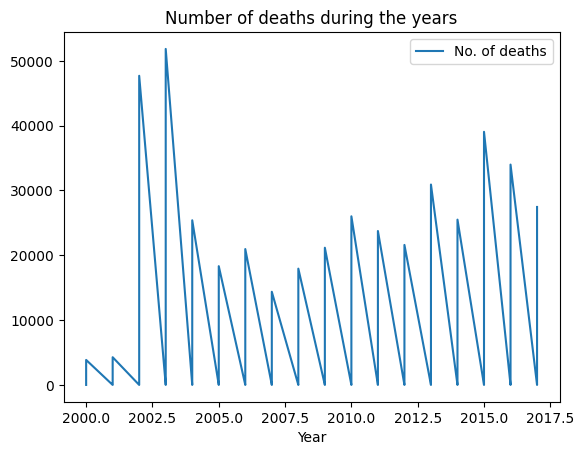

In [38]:
df.plot(title=('Number of deaths during the years'), x='Year', y='No. of deaths')

<Axes: title={'center': 'Number of deaths during the years'}, xlabel='Year', ylabel='No. of deaths'>

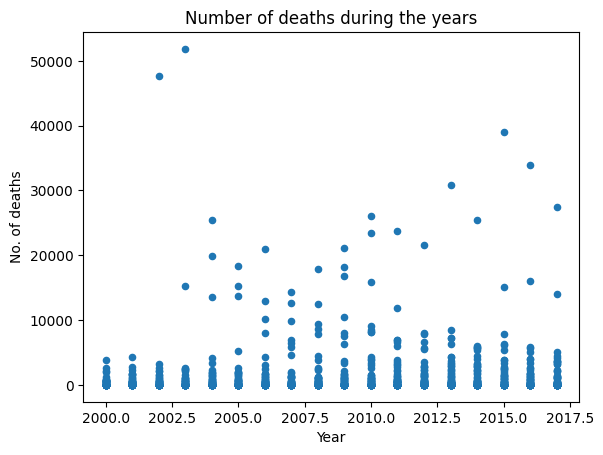

In [39]:
df.plot(title=('Number of deaths during the years'),kind='scatter', x='Year', y='No. of deaths')

<Axes: title={'center': 'Number of deaths according to cases'}, xlabel='No. of cases', ylabel='No. of deaths'>

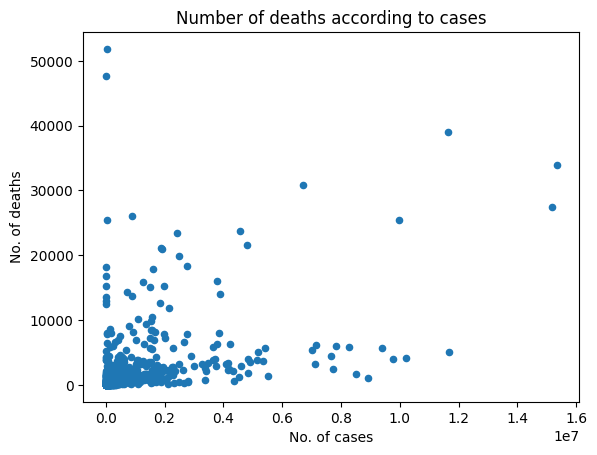

In [40]:
df.plot(title=('Number of deaths according to cases'),kind='scatter', x='No. of cases', y='No. of deaths')

<Axes: title={'center': 'Deaths via the years'}, ylabel='Frequency'>

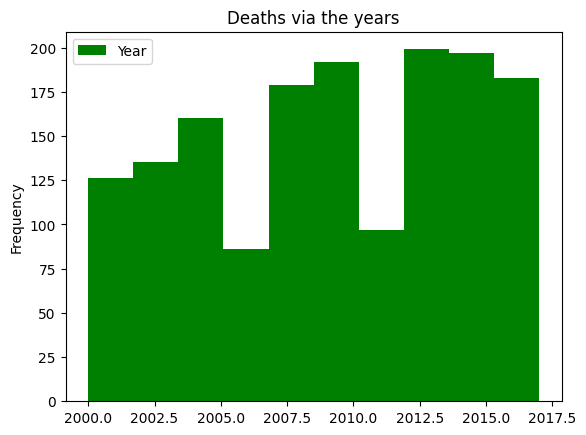

In [41]:
df.plot(title=('Deaths via the years'),kind='hist', x='No. of deaths', y='Year', color='green')

<Axes: title={'center': 'Bar'}, xlabel='Country'>

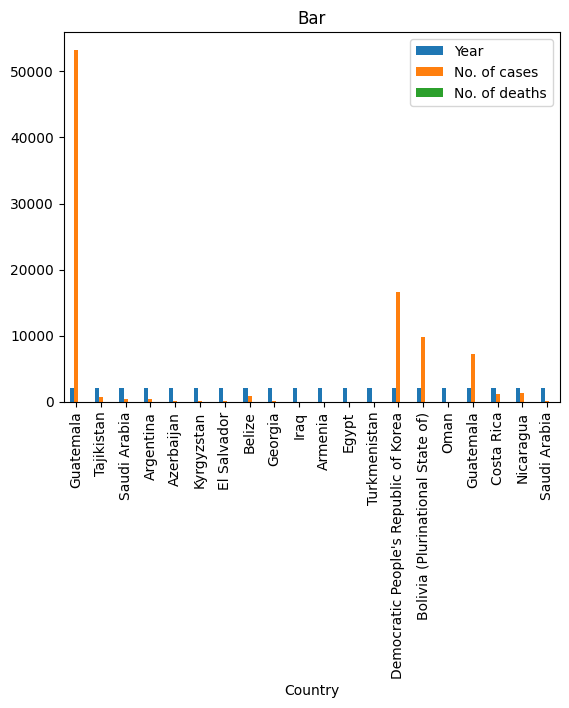

In [42]:
# When the ascending order is equal to True then the sorted values are shown from the less to the higher
n_df = df.sort_values(by='No. of deaths', ascending=True).head(20)
n_df.plot(title=('Bar'),kind='bar', x='Country')

<Axes: title={'center': 'Bar'}, xlabel='WHO Region'>

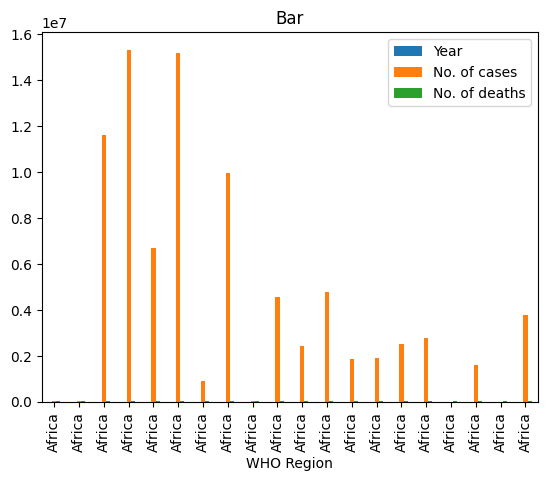

In [43]:
# When the ascending order is equal to False then the sorted values are shown from the highest to the smaller
n_df = df.sort_values(by='No. of deaths', ascending=False).head(20)
n_df.plot(title=('Bar'),kind='bar', x='WHO Region')

<Axes: xlabel='Year'>

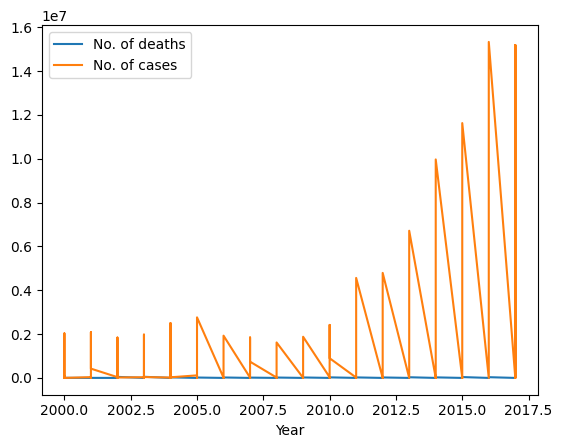

In [44]:
df.plot(x='Year', y=['No. of deaths', 'No. of cases'])

In [45]:
# Here we can observe the skewness and the kurtosis.. The normal skewness is 0 so it means that the distribution of the data is equal for both sides bit here we can see that 
# the skewness is 7.39 that means it is very positive skewed. Kurtosis is 71 which is really high - it means that we have a many outliers.
target = df['No. of deaths']
target.head()

print(target.skew())
print(target.kurt())

7.39699837394725
71.49515125181797


7.39699837394725
71.49515125181797


<ipython-input-46-0de4e5cc886d>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target)


<Axes: xlabel='No. of deaths', ylabel='Density'>

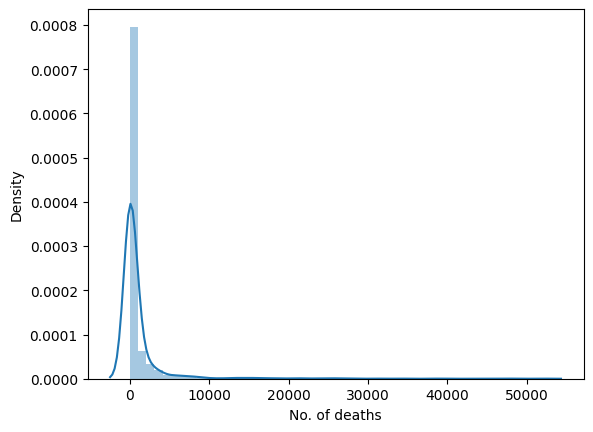

In [46]:
# Here we can observe that there are positive skewness and also that we have many outliers. They can be observed by the blue line that goes away from the curve line. How close to the 
# center are outliers so more impact over the results and analysis.
import seaborn as sns
target = df['No. of deaths']
target.head()

print(target.skew())
print(target.kurt())

sns.distplot(target)

6.089471382683097
47.744271366836095


<ipython-input-47-62ec35fc24c8>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target)


<Axes: xlabel='No. of cases', ylabel='Density'>

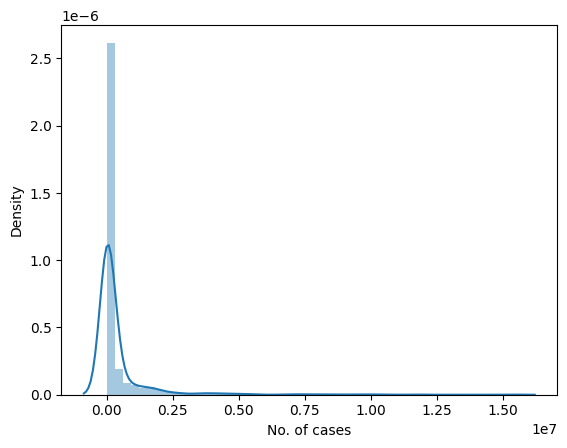

In [47]:
import seaborn as sns
target = df['No. of cases']
target.head()

print(target.skew())
print(target.kurt())

sns.distplot(target)

In [48]:
df.dtypes

Country          object
Year              int64
No. of cases      int64
No. of deaths     int64
WHO Region       object
dtype: object

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

IndexError: ignored

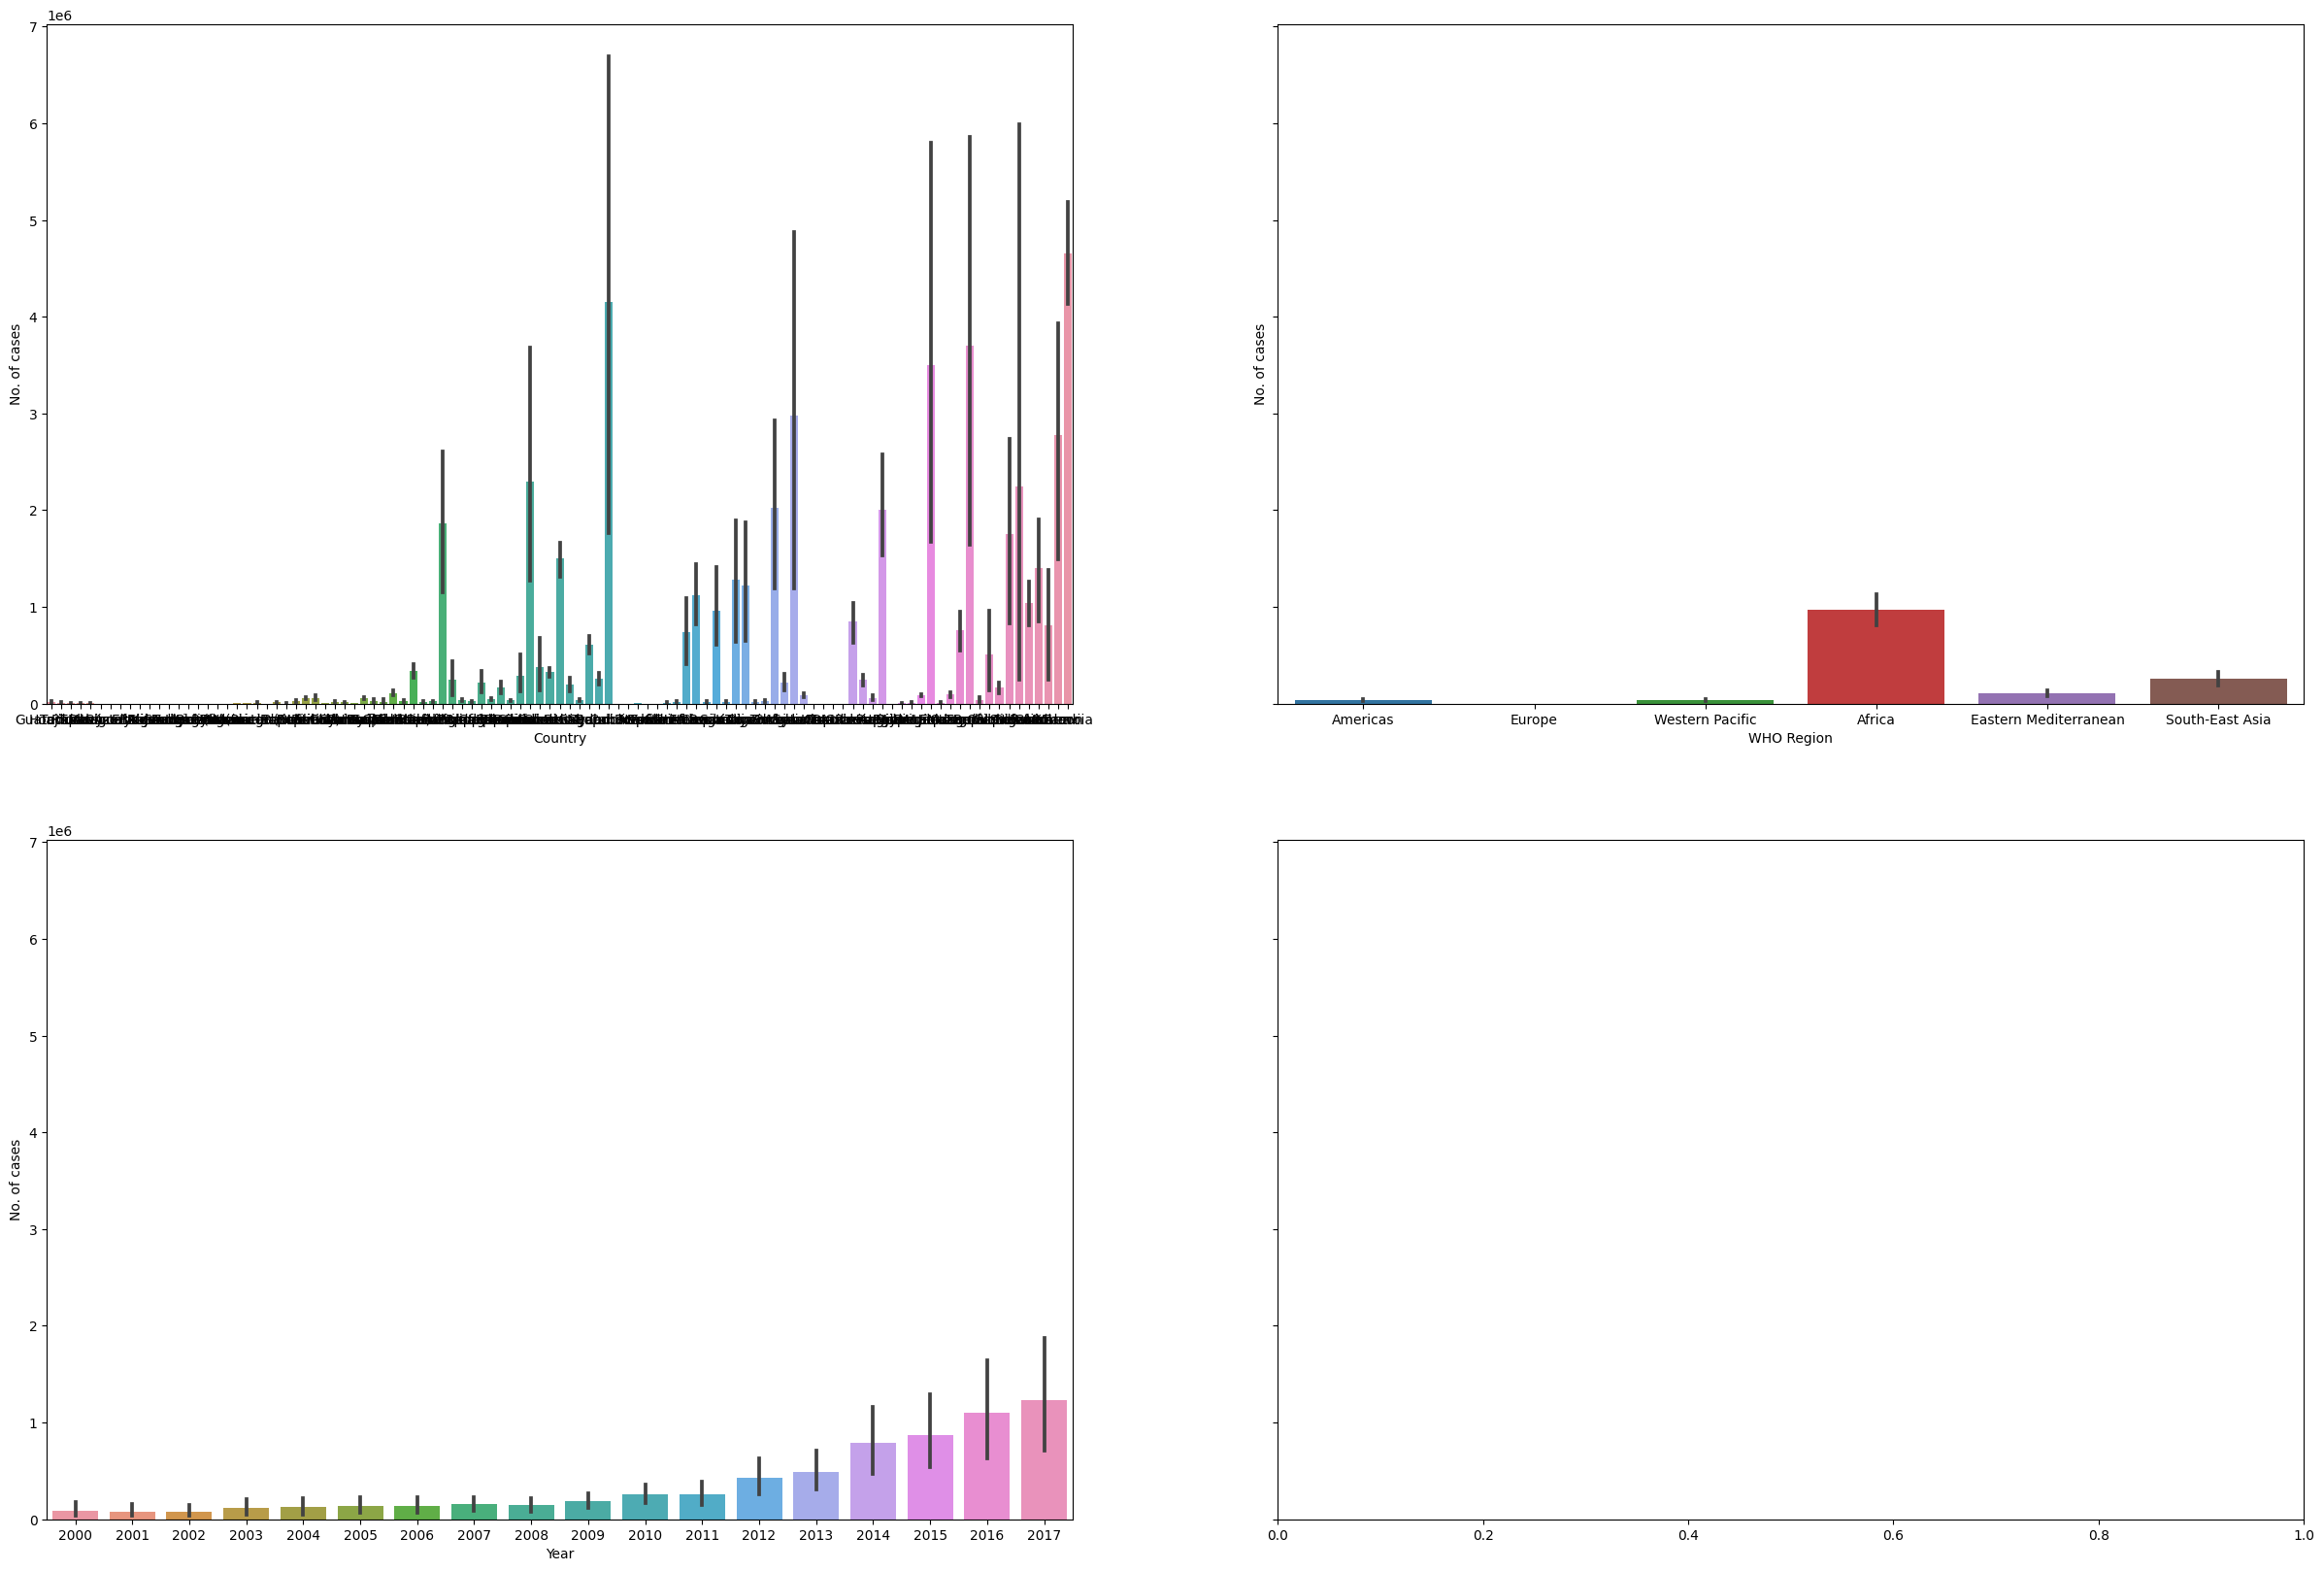

In [119]:
ordinal_cols = [ 'Year', 'WHO Region', 'Country'[:50]]
f, axes = plt.subplots(2, 2, figsize = (30,20), sharey=True, sharex=False)

for row in range(0,2):
  for col in range(0,2):
    sns.barplot(x=ordinal_cols.pop(), y='No. of cases', data=df, ax=axes[row][col])

plt.tight_layout()
plt.show()

In [71]:
numerical_feats = df.dtypes[df.dtypes != 'object'].index
print(numerical_feats)

categorical_feats = df.dtypes[df.dtypes == 'object'].index

print('Numerical: ', len(numerical_feats))
print('Categorical: ', len(categorical_feats))

Index(['Year', 'No. of cases', 'No. of deaths'], dtype='object')
Numerical:  3
Categorical:  2


IndexError: ignored

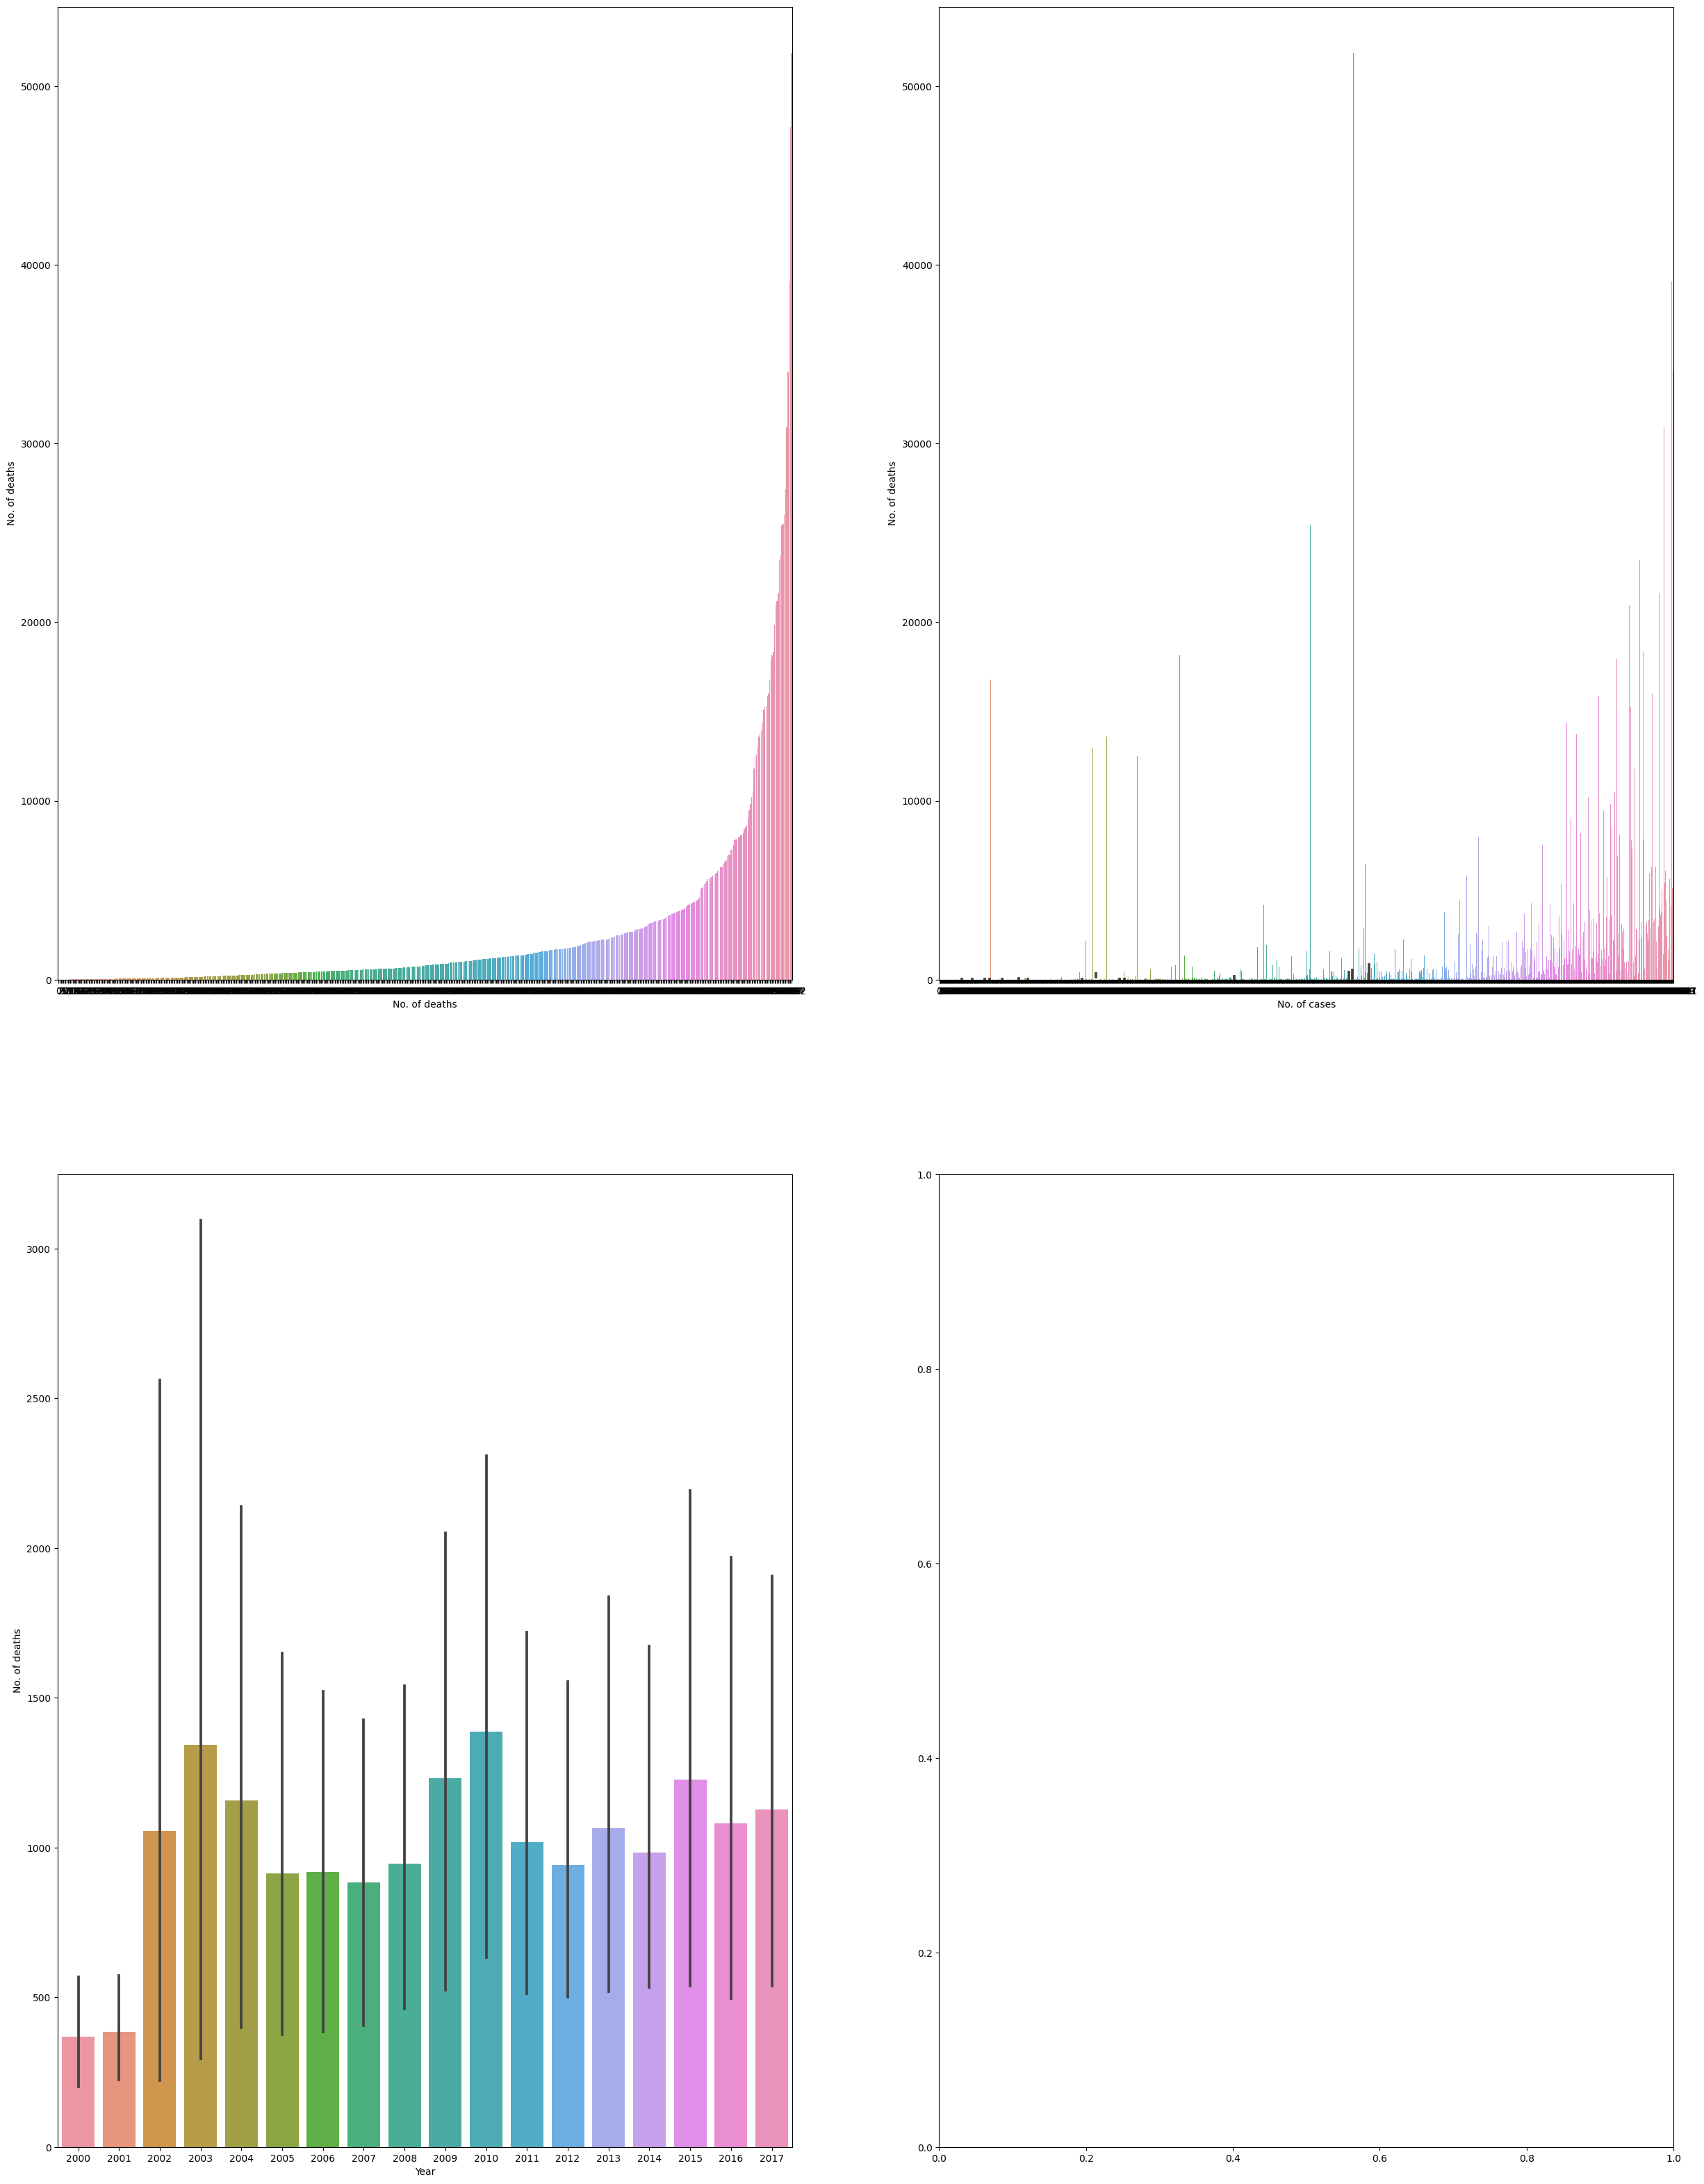

In [116]:
numerical_cols = numerical_feats.tolist()[:9]

fig, axes = plt.subplots(2, 2, figsize = (30,40), sharey=False, sharex=False)
for row in range(0,2):
  for col in range(0,2):
    sns.barplot(x=numerical_cols.pop(), y='No. of deaths', data=df, ax=axes[row][col])

plt.tight_layout()
plt.show()


In [115]:
def clean_data(df):
  df['Year'].apply(lambda element : int(element))
  return df
 

3


IndexError: ignored

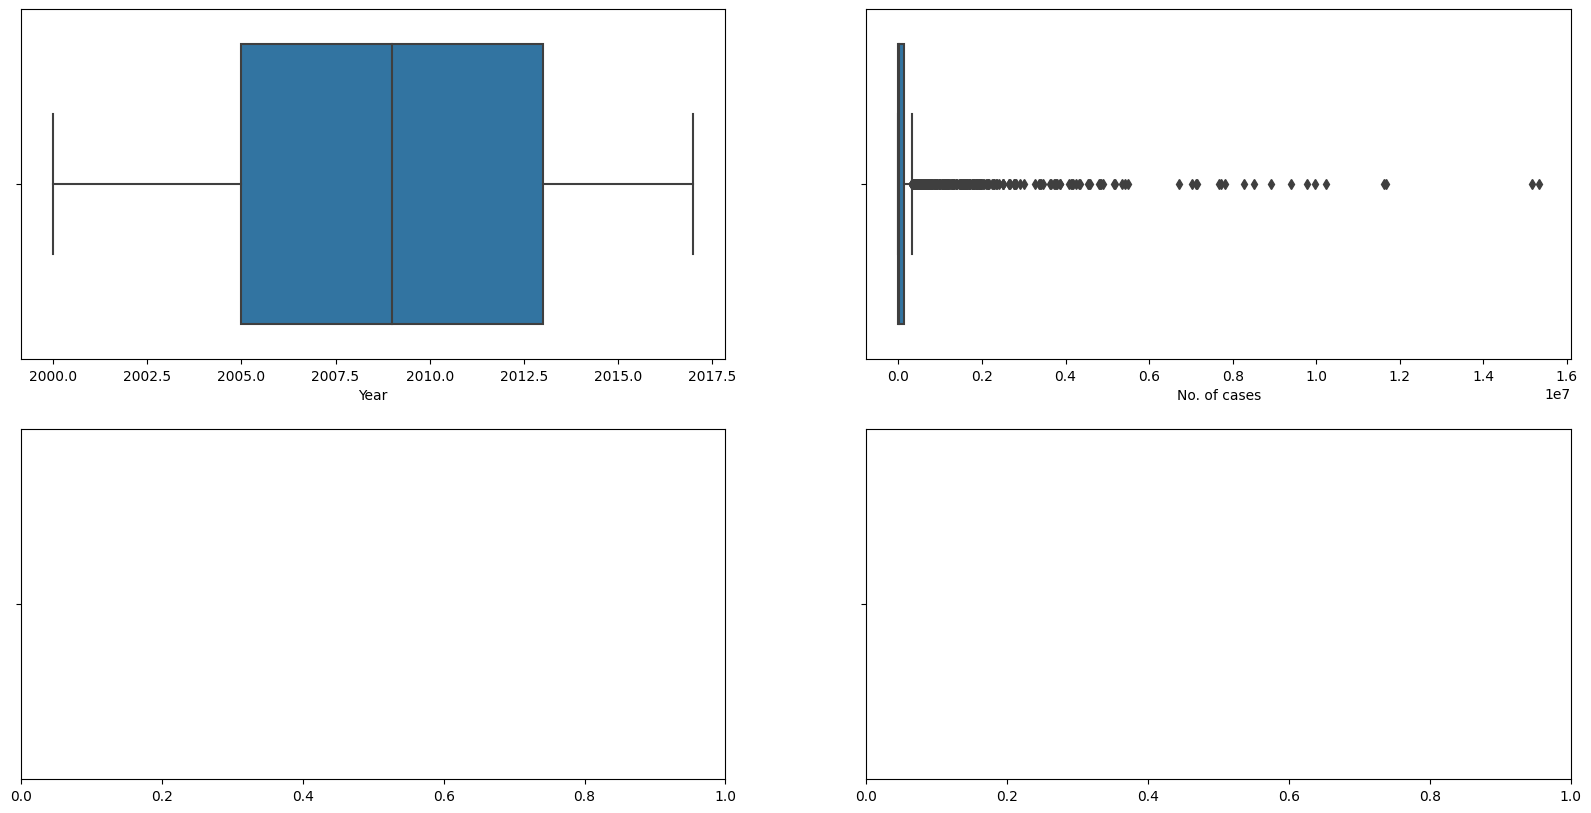

In [109]:
int_cols = list(df.dtypes[df.dtypes == 'int64'].index)
print(len(int_cols))

fig, axes =plt.subplots(2,2, figsize=(20,10), sharey=True, sharex=False)

x, y =0,0
for index, col in enumerate(int_cols):
  sns.boxplot(x=df[col], ax=axes[x, y])

  if y<100:
    y+=1
  elif y == 100:
    x+=1
    y=0
  else:
    y+=1